In [16]:
import pandas as pd

# Load the Excel file
file_path = "/Users/kelvin/CS506Project/AP_Participation_Raw_Data/cleaned_all_ap_participation.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)
print(df)

                                          District Name  District Code  \
0                                      Acton-Boxborough        6000000   
1     Advanced Math and Science Academy Charter (Dis...        4300000   
2                                                Agawam          50000   
3                                              Amesbury          70000   
4                                        Amherst-Pelham        6050000   
...                                                 ...            ...   
5670                                            Webster        3160000   
5671                                           Westford        3260000   
5672                                           Weymouth        3360000   
5673                                             Woburn        3470000   
5674                                       State Totals              0   

      Exam Takers  Exams Taken  Test=1  Test=2  Test=3  Test=4  Test=5  \
0              20           52       

In [17]:
# Filter rows based on conditions
df_2022 = df[df['Year'] == 2022]
print(df_2022)

                                          District Name  District Code  \
248                                            Abington          10000   
249   Academy Of the Pacific Rim Charter Public (Dis...        4120000   
250                                    Acton-Boxborough        6000000   
251   Advanced Math and Science Academy Charter (Dis...        4300000   
252                                              Agawam          50000   
...                                                 ...            ...   
5345                                         Winchester        3440000   
5346                                           Winthrop        3460000   
5347                                             Woburn        3470000   
5348                                          Worcester        3480000   
5349                                       State Totals              0   

      Exam Takers  Exams Taken  Test=1  Test=2  Test=3  Test=4  Test=5  \
248             3            0       

In [18]:
df_2021 = df[df['Year'] == 2021]
print(df_2021)

                                          District Name  District Code  \
0                                      Acton-Boxborough        6000000   
1     Advanced Math and Science Academy Charter (Dis...        4300000   
2                                                Agawam          50000   
3                                              Amesbury          70000   
4                                        Amherst-Pelham        6050000   
...                                                 ...            ...   
5670                                            Webster        3160000   
5671                                           Westford        3260000   
5672                                           Weymouth        3360000   
5673                                             Woburn        3470000   
5674                                       State Totals              0   

      Exam Takers  Exams Taken  Test=1  Test=2  Test=3  Test=4  Test=5  \
0              20           52       

In [19]:
#calculate the mean tests taken for every district
def get_mean_tests(df):
    district_avg_scores = {}
    for index, row in df.iterrows():
        score_sum = 0
        count = 0
        
        for i in range(1, 6):
            if not pd.isnull(row[f'Test={i}']):
                score_sum += i * row[f'Test={i}']
                count += row[f'Test={i}']
                
        # If there are available scores, get the mean score of the district
        if count != 0:
            district_avg_scores[row['District Name']] = score_sum / count
            
    return district_avg_scores

district_avg_scores_2021 = get_mean_tests(df_2021)
district_avg_scores_2022 = get_mean_tests(df_2022)

# Create a new dataframe with the calculated average scores
result_df_2021 = pd.DataFrame(list(district_avg_scores_2021.items()), columns=['District Name', 'Average Tests'])
result_df_2022 = pd.DataFrame(list(district_avg_scores_2022.items()), columns=['District Name', 'Average Tests'])
# Print the resulting dataframe
print(result_df_2021)
print(result_df_2022)


                                         District Name  Average Tests
0                                     Acton-Boxborough       2.151786
1    Advanced Math and Science Academy Charter (Dis...       2.115702
2                                              Andover       1.862069
3                                            Arlington       2.032653
4                                            Attleboro       1.585586
..                                                 ...            ...
278                                   North Brookfield       1.500000
279   Northern Berkshire Regional Vocational Technical       2.000000
280              Rising Tide Charter Public (District)       1.400000
281                               Spencer-E Brookfield       2.454545
282                                         Winchendon       1.800000

[283 rows x 2 columns]
                                         District Name  Average Tests
0    Academy Of the Pacific Rim Charter Public (Dis...       1.702

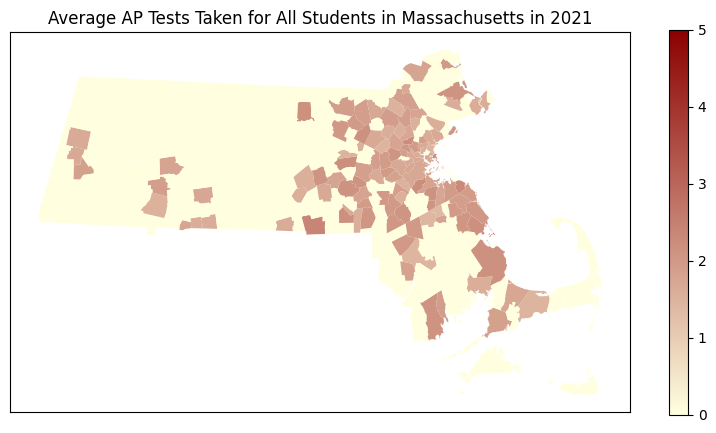

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
gdf = gpd.read_file('/Users/kelvin/ds-ncf-mass-cs-ed/fa23-team-a/data/MA_town_data/TOWNSSURVEY_POLYM_GENCOAST.shp') ## gdf is Geographical Data File


# Merge the GeoDataFrame and the pandas DataFrame on the "TOWN" column
merged = gdf.merge(result_df_2021, left_on='TOWN', right_on='District Name', how='left')

# Fill missing scores with 0
merged['Average Tests'].fillna(0, inplace=True)


# Define a color map for color mapping
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Create a plot with custom styling
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the GeoDataFrame with color mapping
merged.plot(column='Average Tests', cmap=cmap, vmin=0, vmax=5, ax=ax, legend=True)

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Customize the plot (e.g., add a title)
ax.set_title('Average AP Tests Taken for All Students in Massachusetts in 2021')

# Show the plot
plt.show()

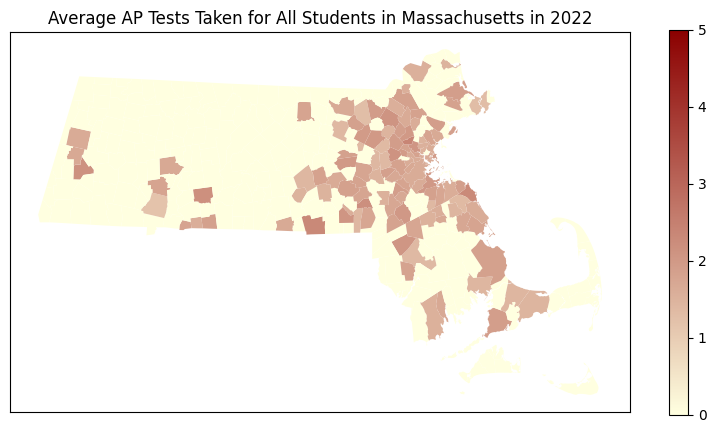

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
gdf = gpd.read_file('/Users/kelvin/ds-ncf-mass-cs-ed/fa23-team-a/data/MA_town_data/TOWNSSURVEY_POLYM_GENCOAST.shp') ## gdf is Geographical Data File


# Merge the GeoDataFrame and the pandas DataFrame on the "TOWN" column
merged = gdf.merge(result_df_2022, left_on='TOWN', right_on='District Name', how='left')

# Fill missing scores with 0
merged['Average Tests'].fillna(0, inplace=True)


# Define a color map for color mapping
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightyellow', 'darkred'])

# Create a plot with custom styling
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot the GeoDataFrame with color mapping
merged.plot(column='Average Tests', cmap=cmap, vmin=0, vmax=5, ax=ax, legend=True)

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Customize the plot (e.g., add a title)
ax.set_title('Average AP Tests Taken for All Students in Massachusetts in 2022')

# Show the plot
plt.show()